---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Christopher Bolaños,** **Mónica Chaves** **y** **Gloriana Mejías**
- Carné: **B31044, B82123, B74636**
- Grupo: **1/2**



# `P5` - *Procesos M/M/s*

> El caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.

---

---
## Asignaciones

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

Entonces,

- (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.
- (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.


---
## Primera Parte

La ecuación para calcular $\rho$ es la siguiente:
\begin{equation}
    \rho=\frac{\lambda}{s\cdot \nu}
    \tag{1}
\end{equation}

Al sustituir los valores:
\begin{equation}
    \rho=\frac{4}{s\cdot 0.25}=\frac{16}{s}
    \tag{2}
\end{equation}

Con el suma de probabilidades del estado estable que, 

\begin{equation}
    P(\text{51 personas o más en la fila}1) = \sum_{i=51}^{\infty} (1 - \rho)\rho^{i}= 1 - \sum_{i=0}^{50} (1 - \rho)\rho^{i} = \rho^{51}
    \tag{3}
\end{equation}

El 5% genera la condición de ruptura:

\begin{equation}
 \rho^{51}\leq 0.05
 \tag{4}
\end{equation}

Al sustituir valor de $\rho$:
\begin{equation}
  \left(\frac{16}{s} \right)^{51}\leq 0.05  
  \tag{5}
\end{equation}

Se despeja s:
\begin{equation*}
 \Longrightarrow  \left(\frac{16^{51}}{s^{51}} \right)\leq 0.05  
\end{equation*}

\begin{equation*}
  \Longrightarrow \left(\frac{16^{51}}{0.05} \right)\leq   s^{51}
\end{equation*}

\begin{equation*}
 \Longrightarrow  \left(\frac{16^{51}}{0.05} \right)\leq   s^{51}
\end{equation*}

\begin{equation*}
 \Longrightarrow \sqrt[51]{ \left(\frac{16^{51}}{0.05} \right)}\leq   s
\end{equation*}

\begin{equation*}
 \Longrightarrow 16\cdot\sqrt[51]{ \left(\frac{1}{0.05} \right)}\leq   s
\end{equation*}

\begin{equation}
 \Longrightarrow 16.9680\leq   s 
 \tag{6}
\end{equation}
 
 Por lo que, el número de servidores debe tener al menos 17 para se cumpla la condición del enunciado, que es mantener menos de 50 personas en la cola en 95% del tiempo.

---
## Segunda Parte

Parámetro lambda = 4.0
Servidores s = 17
Parámetro nu = 0.25
Tiempo con igual de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.47 horas.


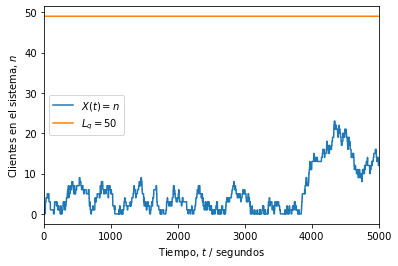

In [96]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#Caso 1 cuando s = 17

# Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Número de servidores
s = 17

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 50

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1
        
# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Servidores s =', str(s))
print('Parámetro nu =', str(nu*60))
print('Tiempo con igual de {} solicitudes en fila:'.format(P))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

Parámetro lambda = 4.0
Servidores s = 6
Parámetro nu = 0.25
Tiempo con más de 50 solicitudes en fila:
	 92.29%
	 No cumple con la especificación.
Simulación es equivalente a 11.12 horas.


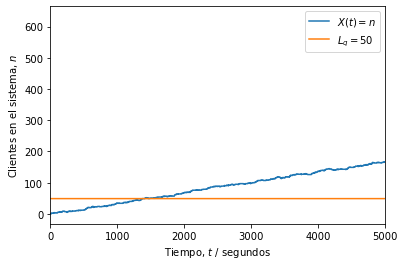

In [97]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#Caso 2 cuando s = 6

# Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Número de servidores
s = 6

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 50

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1
    
# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Servidores s =', str(s))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---